<a href="https://colab.research.google.com/github/yukliio/stemcamp.aistation/blob/main/lab_notebooks/playground/playground_BoneFracture_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement: 🧠 Using AI to Help Doctors Spot Bone Fractures 🤖

In small towns and villages, doctors may not have high-tech machines or strong internet. They need a smart, easy-to-use tool that can help them detect bone fractures just by looking at MRI scans — no X-rays needed!

### 💡 What This Tool Does:
- Uses a **Random Forest** model 🌳 to study MRI images.
- Analyzes scans of bones to figure out whether there's a fracture.

### 🧪 What It Should Predict:
Whether a bone is **fractured** or **not fractured**.

### Let's Start Building!


# ⭐ Step 0: download our dataset.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yukliio","key":"edbf83c0bd6f85a815eb0d6262aec67d"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~/.kaggle

In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data --force
!unzip -q fracture-multi-region-x-ray-data.zip -d fracture-multi-region-x-ray


Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
 97% 469M/481M [00:03<00:00, 114MB/s]
100% 481M/481M [00:03<00:00, 153MB/s]


# ⭐ Step 1: Get Our Images Ready 🧠🖼️

---



Before the AI can learn to spot bone fractures, we need to turn the x-ray images into something it can understand — numbers!

## 🛠️ What This Code Does:

1. **Resize** every image to **128 x 128 pixels** so they all look the same to the computer.
2. **Flatten** the images — this means we **turn a 2D image into 1 long list of numbers**.
   - Computers need everything to be in a straight line (1D), not a grid (2D)!
   - Example: If an image is 128x128 pixels, flattening it gives **16,384 numbers** (128 × 128).
   - [[ 10, 20, 30],
      [ 40, 50, 60],
      [ 70, 80, 90]] (2D) ---> [10, 20, 30, 40, 50, 60, 70, 80, 90] (Flattened 1D)

In [ ]:
from PIL import Image
import numpy as np
import os

image_size = (128, 128)  # Resize all images to 64x64

def load_and_preprocess(image_folder):
    data = []
    labels = []

    for label_name in os.listdir(image_folder):
        label_folder = os.path.join(image_folder, label_name)
        for image_file in os.listdir(label_folder):
            img_path = os.path.join(label_folder, image_file)
            try:
              img = Image.open(img_path).convert('L')

              # ✂️ Resize the image to 128 x 128 pixels [WRITE CODE UNDER HERE]!

              # 🔢 Turn the image into a big list of numbers (flatten it) [WRITE CODE UNDER HERE]


              data.append(img_array)
              labels.append(label_name)

            except Exception as e:
              pass
    return np.array(data), np.array(labels)

train_dir = "/content/fracture-multi-region-x-ray/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/"
print("📥 Loading training images...")
X_train, y_train = load_and_preprocess(train_dir)

print("✅ X_train shape (images):", X_train.shape) # the number should be (5712, 16384) since 128 * 128 = 16384!
print("✅ y_train shape (labels):", y_train.shape)

print("🎉 All images are loaded and ready for the AI to learn!")

X_test, y_test = load_and_preprocess('/content/fracture-multi-region-x-ray/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/')

Shape of X_train: (9240, 16384)
Shape of y_train: (9240,)


In [ ]:
print(f'length of the training set: {len(X_train)}')
print(f'length of the testing set: {len(X_test) }')

length of the training set: 9240
length of the testing set: 500


# ⭐ Step 2: Preview the X-rays 🩻👀

Let’s look at 25 random x-ray images from our training data.

## 🛠️ What This Code Does:

- Picks random images from the dataset 🎲  
- Shows them in a 5×5 grid 🖼️  
- Displays the label: **fractured** or **not fractured**

A quick check to make sure everything looks good before training! ✅

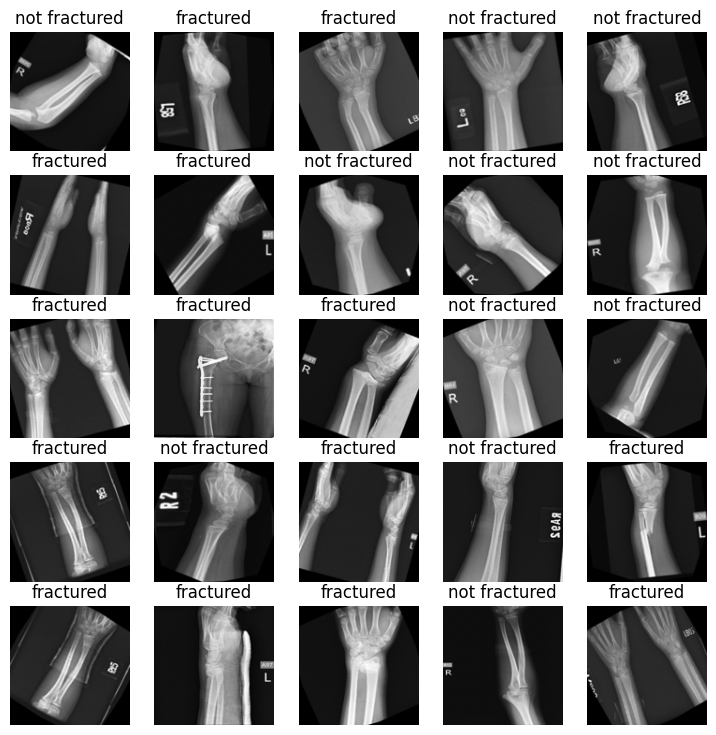

In [ ]:
import random
random.seed(10)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

fig = plt.figure(figsize=(9, 9))

# ✖️ Set up a grid to show 25 images [WRITE CODE UNDER HERE]


for i in range(1, rows * cols + 1):
    random_index =  random.randint(0, len(X_train))
    image = X_train[random_index]
    label = y_train[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.reshape(128, 128), cmap="gray")
    plt.title(label)
    plt.axis("off")

# ⭐ Step 3: Train the Model 🌳🤖

We will use a Random Forest model to learn from the x-rays and spot fractures!

---

### 🤔 What is a Random Forest?

A **Random Forest** is a type of AI model made up of many **decision trees**. Think of it like this:

- 🌲 Each tree is like a small "expert" that makes guesses based on what it sees.
- 🌳 When we put lots of trees together, they vote on what the answer should be.
- ✅ The final answer is based on the **majority vote** from all the trees — like teamwork!

This helps the model be more accurate and less likely to get tricked by strange or unusual images.

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1280/0*VdemgOqLxWHyJEH3" width="500"/>
</p>

 **n_estimators** just means we have **25 trees** to help us make predictions. The more trees, more more decisions the AI will have to make before determining whether the patient has a bone fracture or not.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bonefracture_AI = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state =0)

# 👩‍🏫 teach the AI based off of our training data [WRITE CODE UNDER HERE]


RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

# ⭐ Step 4: Check AI Accuracy ✅📊
We test the AI’s guesses on new x-rays and see how accurate it is using a confusion matrix.

### What’s a Confusion Matrix? ❓

It’s a chart that helps us see how well our AI is doing by comparing its guesses to the real answers.

- ✅ **True Positive (TP):** AI correctly says "fractured" when the bone is fractured.
- ✅ **True Negative (TN):** AI correctly says "not fractured" when the bone is healthy.
- ❌ **False Positive (FP):** AI says "fractured" but the bone is actually healthy.
- ❌ **False Negative (FN):** AI says "not fractured" but the bone is fractured.

This helps us understand where the AI gets it right — and where it makes mistakes!

<p align="center">
  <img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42677529a0f4e97e4f96_644aea65cefe35380f198a5a_class_guide_cm08.png" width="500"/>
</p>




Accuracy of Random Forest bone fracture detection model: 99.0%


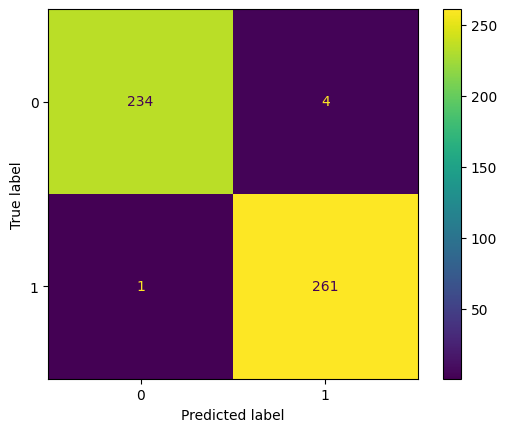

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 1: Make predictions
y_pred = bonefracture_AI.predict(X_test)

# Step 2: Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Let's see the  results!
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(f"Accuracy of Random Forest bone fracture detection model: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")

# ⭐ Step 5: Did Our AI Get It Right?

Now that we've trained our AI to detect brain tumors using Random Forest, it's time to test how well it's doing!

In this step, we:
- Ask the AI to look at brain scans it hasn't seen before
- Check how many it got right ✅
- Check how many it got wrong ❌
- Show the results in a colorful bar chart!

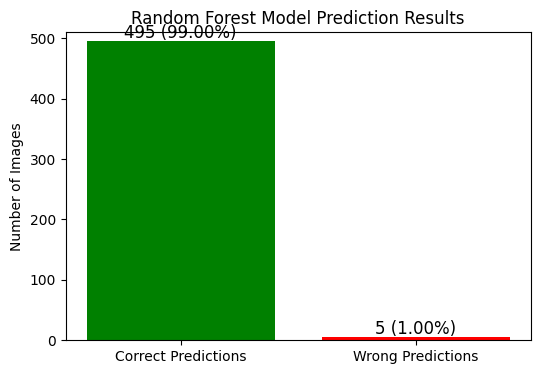

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 🧮 Make predictions [WRITE CODE UNDER HERE]


# Calculate number of correct and wrong predictions
correct = sum(y_pred == y_test)
wrong = sum(y_pred != y_test)

# Plot the results
plt.figure(figsize=(6,4))
plt.bar(['Correct Predictions', 'Wrong Predictions'], [correct, wrong], color=['green', 'red'])
plt.title('Random Forest Model Prediction Results')
plt.ylabel('Number of Images')
plt.ylim(0, len(y_test) + 10)

# Show the accuracy as text above the bars
accuracy = accuracy_score(y_test, y_pred)
plt.text(0, correct + 5, f"{correct} ({accuracy*100:.2f}%)", ha='center', color='black', fontsize=12)
plt.text(1, wrong + 5, f"{wrong} ({(1-accuracy)*100:.2f}%)", ha='center', color='black', fontsize=12)

plt.show()

# ⭐ Step 6: Visualize the AI’s Predictions 🎯🩻

Let’s look at 25 random x-ray images from the test set and see how well the AI did.

- For each image, we show the **true label (T)** and the AI’s **prediction (P)**.  
- If the AI guessed correctly, the title is **green** ✅.  
- If it guessed wrong, the title turns **red** ❌.

This helps us quickly spot where the AI is doing great — and where it needs improvement.

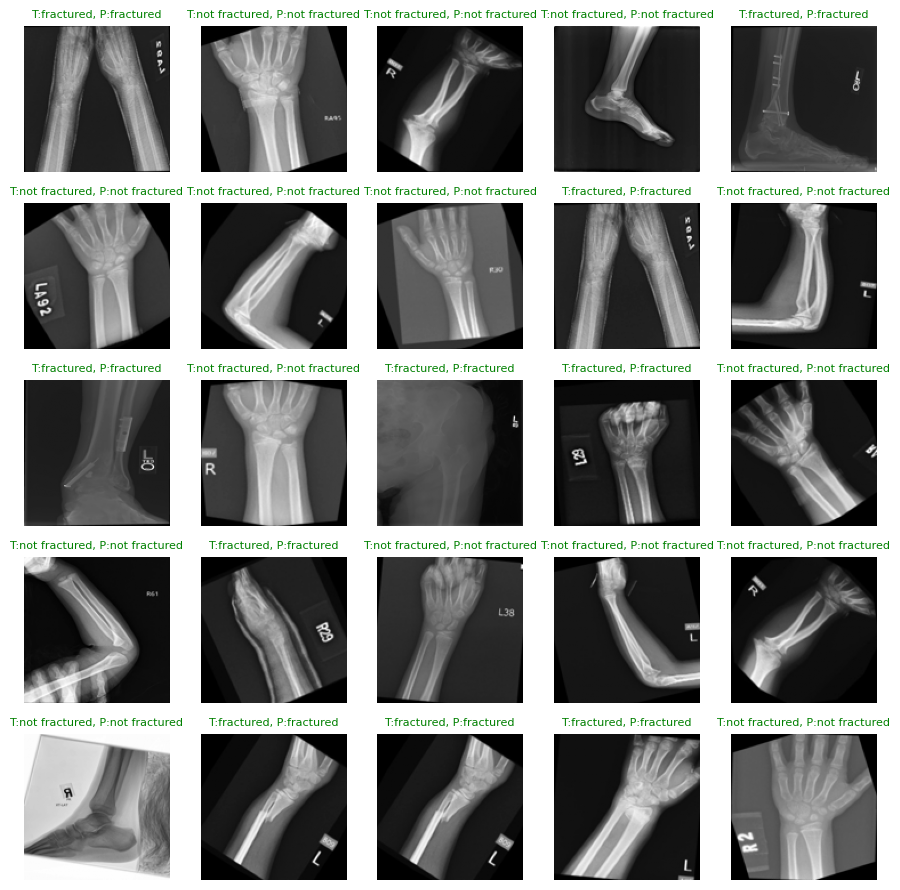

In [ ]:
import matplotlib.pyplot as plt
import random

random.seed(10)
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5

for i in range(1, rows * cols + 1):
    random_index = random.randint(0, len(X_test) - 1)
    image = X_test[random_index]
    label = y_test[random_index]
    prediction = bonefracture_AI.predict(image.reshape(1, -1))[0]

    # 💚 Set the text green if correct. Otherwise, red [WRITE CODE UNDER HERE]!


    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image.reshape(128, 128), cmap="gray")
    ax.set_title(f"T:{label}, P:{prediction}", fontsize=8, color=color)
    ax.axis("off")

plt.tight_layout()
plt.show()


# 🎉 Congrats on Completing Your AI Project! 🧠🤖

Awesome job! You created an AI that can spot bone fractures from x-rays — that’s seriously impressive! 💪